<a href="https://colab.research.google.com/github/Saidul-1/CSE4132-Artificial-Intelligence-Lab/blob/main/Assignment2_Custom_FCFNN_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Write a report in pdf format using any Latex system after:
* drawing a Fully Connected Feed-forward Neural Network (FCFNN) according to
your preferences.
* implementing it using Tensforflow.Keras.

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_20 (InputLayer) │ (None, 1)             │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ hidden_layer1 (Dense)       │ (None, 8)             │         16 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ hidden_layer2 (Dense)       │ (None, 4)             │         36 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ hidden_layer3 (Dense)       │ (None, 8)             │         40 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ output_layer (Dense)        │ (None, 1)             │          9 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 101 (404.00 B)

 Trainable params: 101 (404.00 B)

 Non-trainable params: 0 (0.00 B)

700 100 200
Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1206 - val_loss: 0.0738
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0742 - val_loss: 0.0505
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0580 - val_loss: 0.0386
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0370 - val_loss: 0.0303
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0291 - val_loss: 0.0225
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0215 - val_loss: 0.0142
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0135 - val_loss: 0.0091
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0086 - val_loss: 0.0060
Epoch 9/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0051 - val_loss: 0.0043
Epoch 10/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0041 - val_loss: 0.0032
Epoch 11/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0033 - val_loss: 0.0026
Epoch 12/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

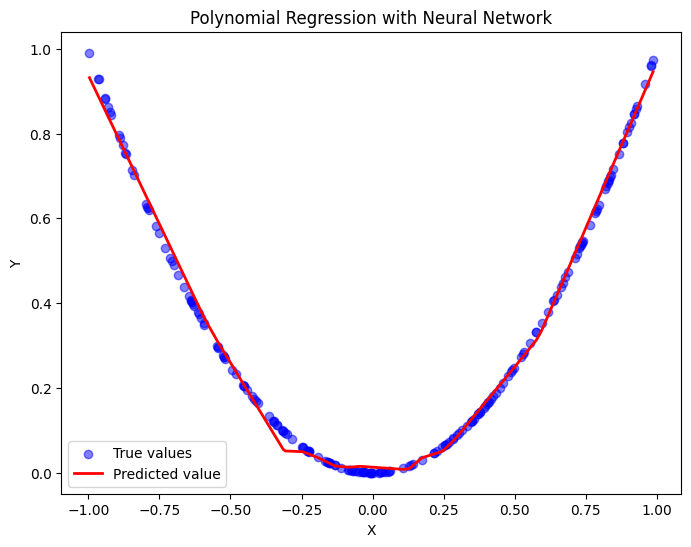

In [ ]:

def main():
    #--- Build Model
    model = build_model()
    model.compile(loss='mse')

    (trainX, trainY), (valX, valY), (testX, testY) = prepare_train_val_test()
    validation_data = (valX, valY)
    model.fit(trainX, trainY, validation_data=validation_data, epochs=30)


    # --- Evaluate & Plot
    y_pred = model.predict(testX)

    sorted_idx = np.argsort(testX.reshape(-1))
    testX_sorted = testX[sorted_idx]
    testY_sorted = testY[sorted_idx]
    y_pred_sorted = y_pred[sorted_idx]

    plt.figure(figsize=(8,6))
    plt.scatter(testX_sorted, testY_sorted, color='blue', label='True values', alpha=0.5)
    plt.plot(testX_sorted, y_pred_sorted, color='red', label='Predicted value', linewidth=2)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Polynomial Regression with Neural Network")
    plt.legend()
    plt.show()




def prepare_train_val_test():
    x, y = data_process()
    total_n = len(x)
    train_n = int(total_n*0.7)
    val_n = int(total_n*0.1)
    test_n = int(total_n*0.2)

    trainX = x[: train_n]
    trainY = y[: train_n]

    valX = x[train_n : train_n+val_n]
    valY = y[train_n : train_n+val_n]

    testX = x[train_n+val_n :]
    testY = y[train_n+val_n :]

    print(len(trainX), len(valX), len(testX))
    return (trainX, trainY), (valX, valY), (testX, testY)


def data_process():
    n = 1000
    x = np.random.randint(-n, n, n) #(left_limit, right_limit, count)
    y = []
    for i in range(n):
        y.append(my_polynomial(x[i]))

    x = np.array(x).reshape(-1,1)
    y = np.array(y).reshape(-1,1)

    x = x / np.max(np.abs(x))
    y = y / np.max(np.abs(y))


    return x, y

def my_polynomial(x):
    y = 5*x*x+3*x-20
    return y

def build_model():
    inputs = Input((1, ))
    h1 = Dense(8, activation = 'relu', name = 'hidden_layer1')(inputs)
    h2 = Dense(4, activation = 'relu', name = 'hidden_layer2')(h1)
    h3 = Dense(8, activation = 'relu', name = 'hidden_layer3')(h2)
    outputs = Dense(1, activation = 'linear', name = 'output_layer')(h3)
    model = Model(inputs, outputs)
    model.summary(show_trainable = True)
    return model

if __name__ == '__main__':
    main()